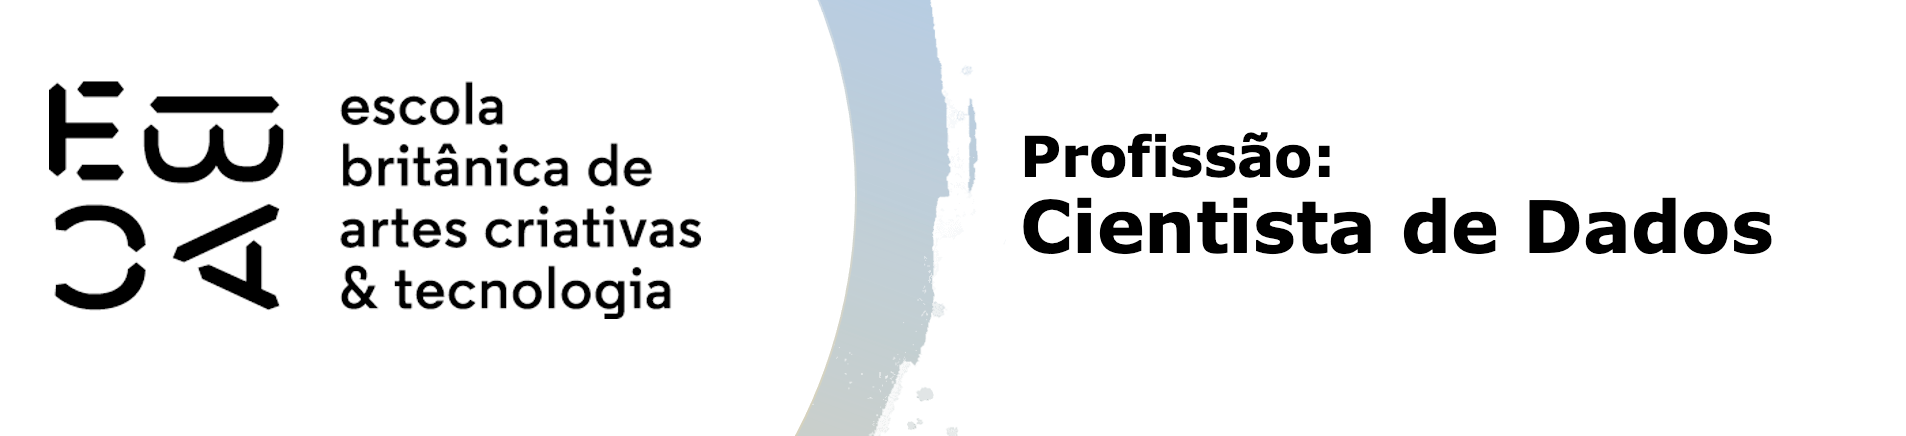

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda_II.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelo de previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats

from scipy.stats import zscore
from scipy.linalg import qr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
# Carregando o DataFrame (substitua pelo seu caminho de arquivo)
df = pd.read_csv('./previsao_de_renda_II.csv')

# Removendo colunas que não serão usadas no modelo
df.drop(['data_ref', 'index'], axis=1, inplace=True)

# Convertendo colunas booleanas para numéricas (assumindo que 'S' é True e 'N' é False)
bool_cols = ['sexo', 'posse_de_veiculo', 'posse_de_imovel']
for col in bool_cols:
    df[col] = df[col].map({'M': 1, 'F': 0, 'S': 1, 'N': 0})

# Convertendo colunas categóricas para numéricas usando codificação one-hot
cat_cols = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Substituindo valores ausentes pela média
df.fillna(df.mean(), inplace=True)

# Transformando a variável 'renda' usando log
df['renda'] = np.log(df['renda'])

# Mostrando as primeiras linhas do DataFrame transformado
print(df.head())

   sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  tempo_emprego  \
0     1                 1                0           0     47      16.717808   
1     1                 1                0           0     30       9.600000   
2     1                 1                0           0     28       8.208219   
3     1                 0                1           2     44       1.301370   
4     0                 0                1           2     33       1.254795   

   qt_pessoas_residencia     renda  tipo_renda_Bolsista  \
0                    2.0  9.318131                False   
1                    2.0  7.793508                False   
2                    2.0  9.528769                False   
3                    4.0  7.767196                False   
4                    4.0  6.673020                False   

   tipo_renda_Empresário  ...  educacao_Superior incompleto  \
0                   True  ...                         False   
1                  False  ...         

In [46]:
# Substituindo espaços por underscores nos nomes das colunas
df.columns = df.columns.str.replace(' ', '_')

# Verificando se os nomes das colunas foram atualizados corretamente
print(df.columns)

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda',
       'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor_público',
       'educacao_Médio', 'educacao_Pós_graduação',
       'educacao_Superior_completo', 'educacao_Superior_incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com_os_pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'],
      dtype='object')


In [47]:
# Identificando todas as colunas booleanas e convertê-las para int
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Mostrando as primeiras linhas do DataFrame transformado
print(df.head())

   sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  tempo_emprego  \
0     1                 1                0           0     47      16.717808   
1     1                 1                0           0     30       9.600000   
2     1                 1                0           0     28       8.208219   
3     1                 0                1           2     44       1.301370   
4     0                 0                1           2     33       1.254795   

   qt_pessoas_residencia     renda  tipo_renda_Bolsista  \
0                    2.0  9.318131                    0   
1                    2.0  7.793508                    0   
2                    2.0  9.528769                    0   
3                    4.0  7.767196                    0   
4                    4.0  6.673020                    0   

   tipo_renda_Empresário  ...  educacao_Superior_incompleto  \
0                      1  ...                             0   
1                      0  ...         

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

**Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios? [FALTA RESPONDER]**

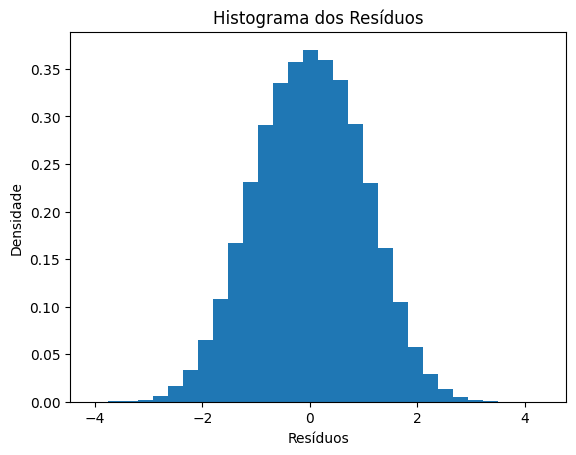

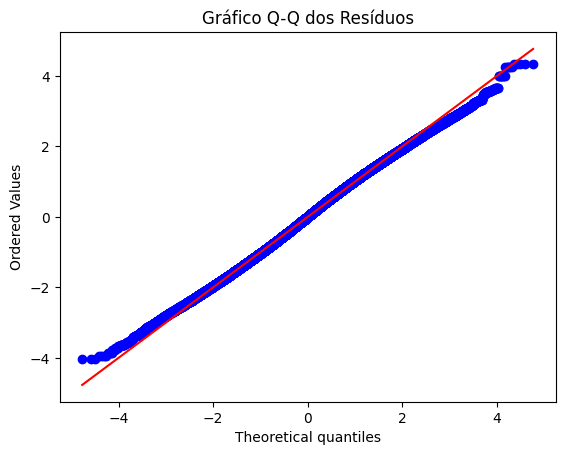

In [48]:
# Ajustando o modelo
formula = 'renda ~ ' + ' + '.join(df.columns.difference(['renda']))
model = smf.ols(formula=formula, data=df).fit()

# Calculando os resíduos
residuals = model.resid

# Histograma
plt.hist(residuals, bins=30, density=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

# Gráfico Q-Q
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Gráfico Q-Q dos Resíduos")
plt.show()

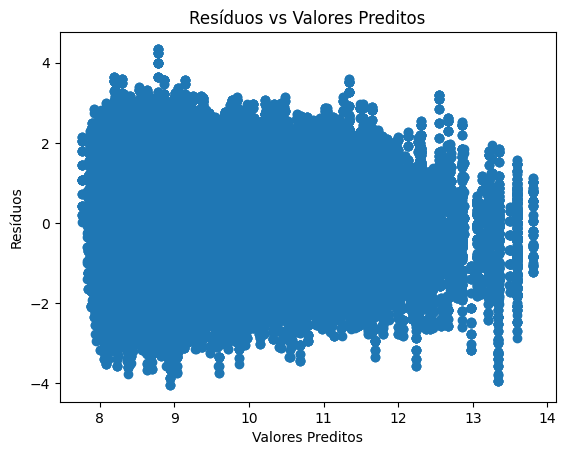

In [49]:
# Resíduos vs Valores Preditos
plt.scatter(model.fittedvalues, residuals)
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

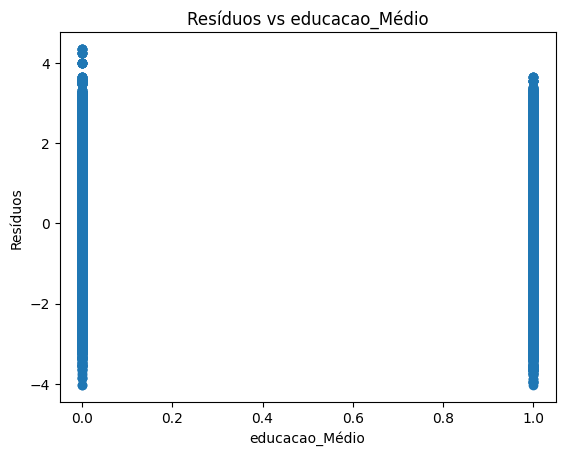

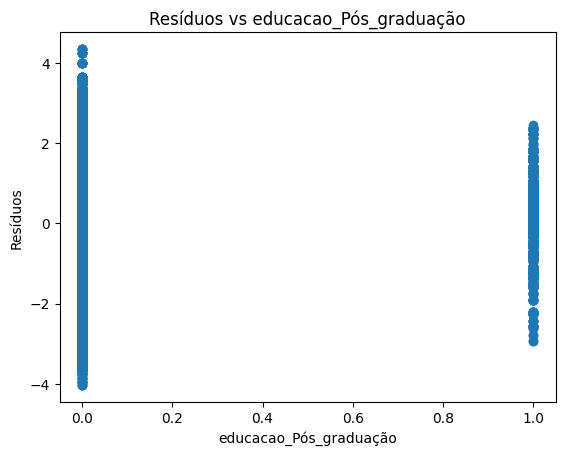

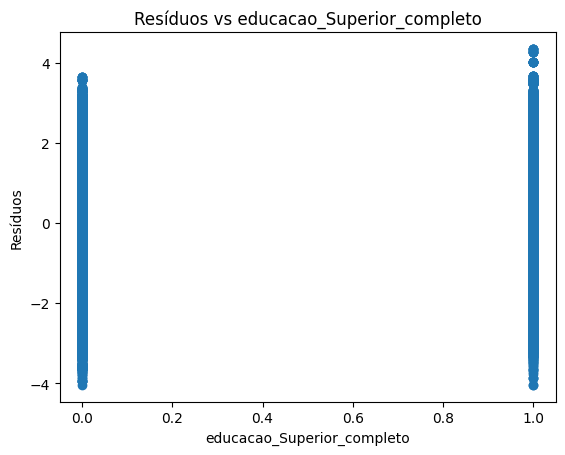

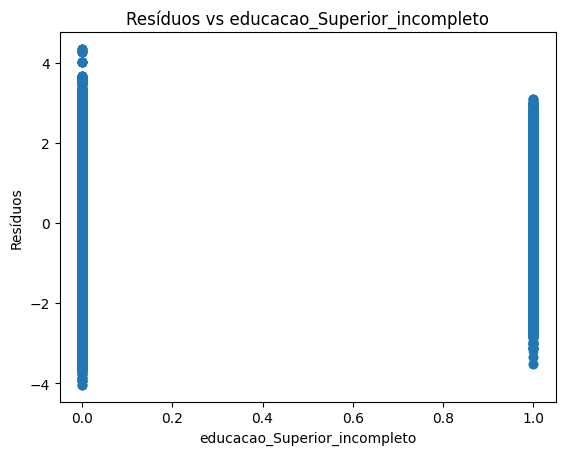

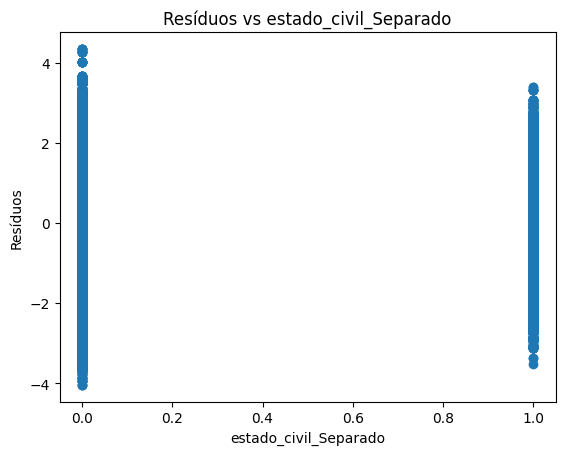

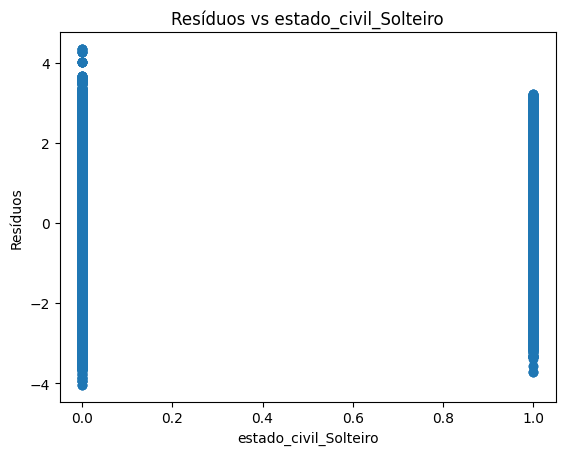

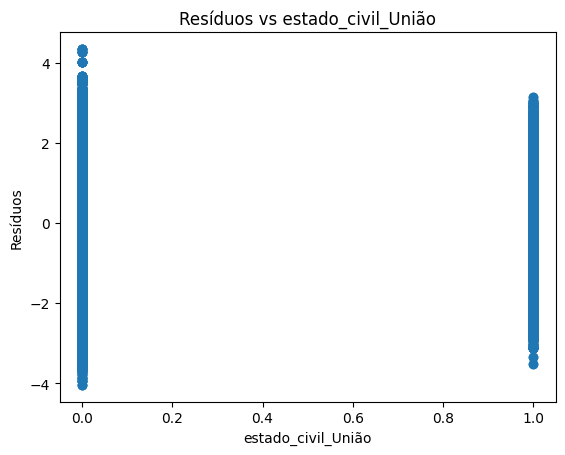

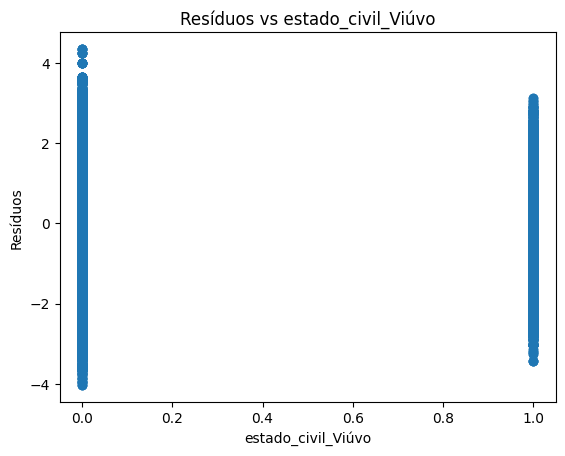

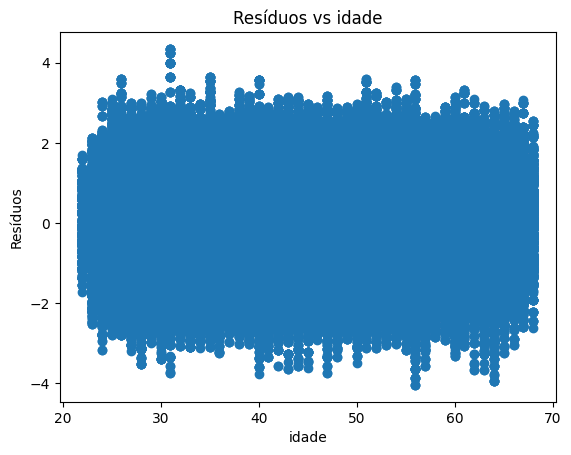

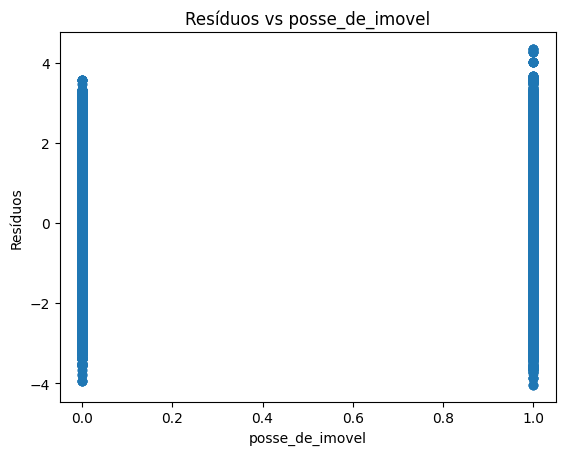

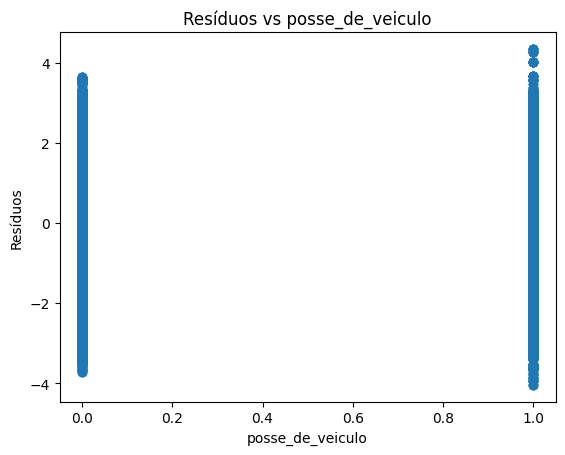

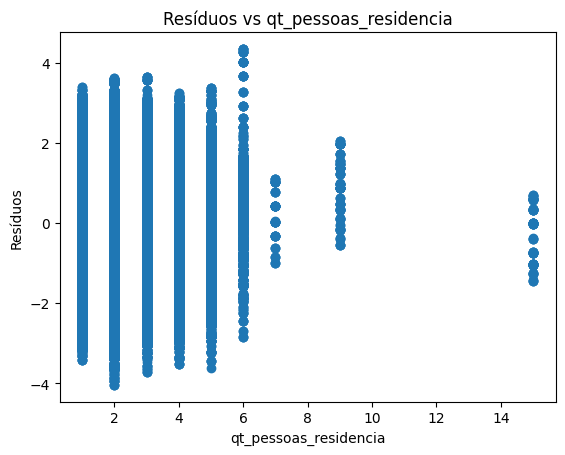

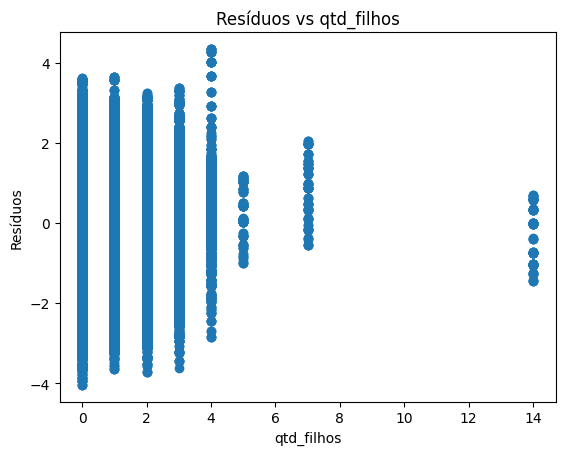

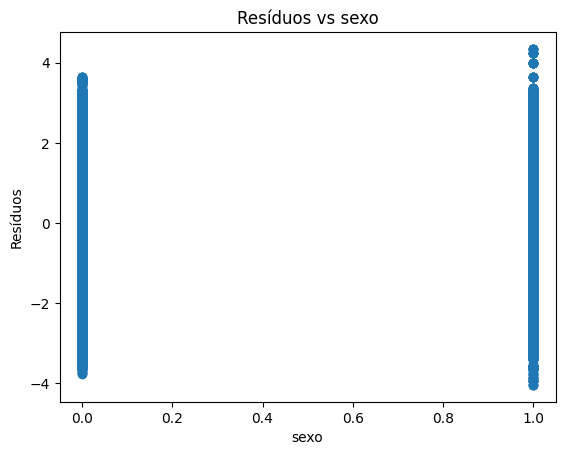

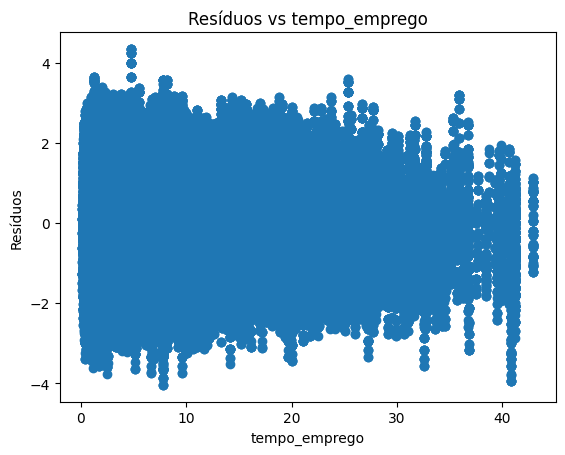

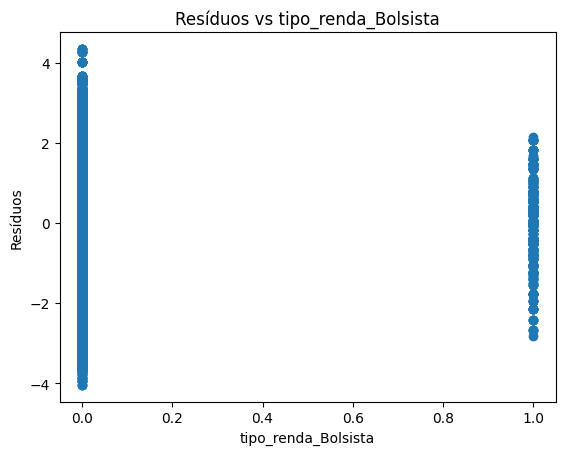

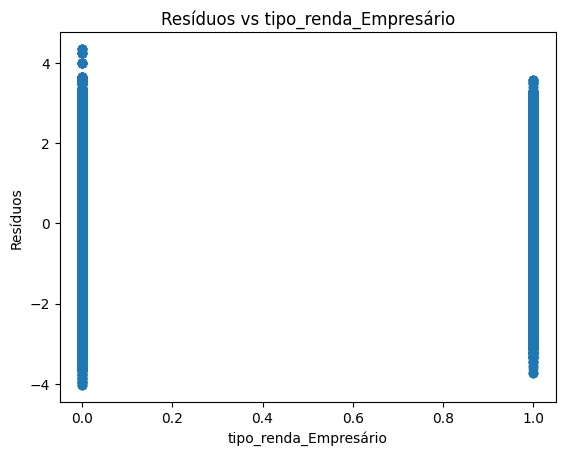

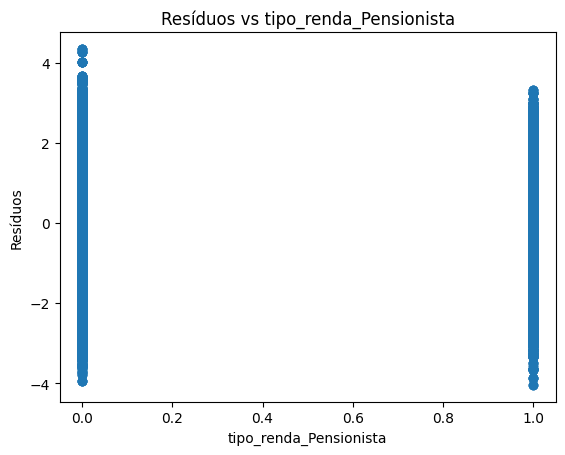

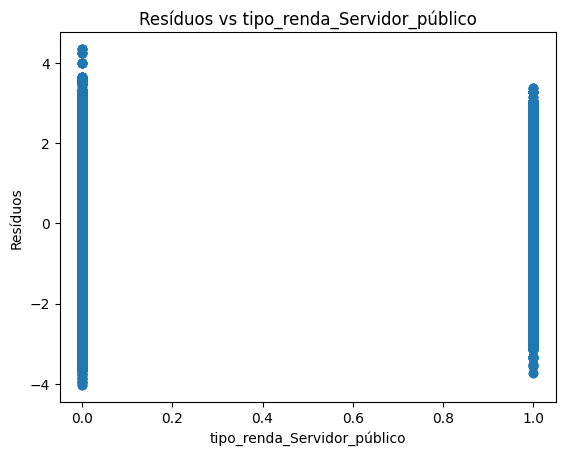

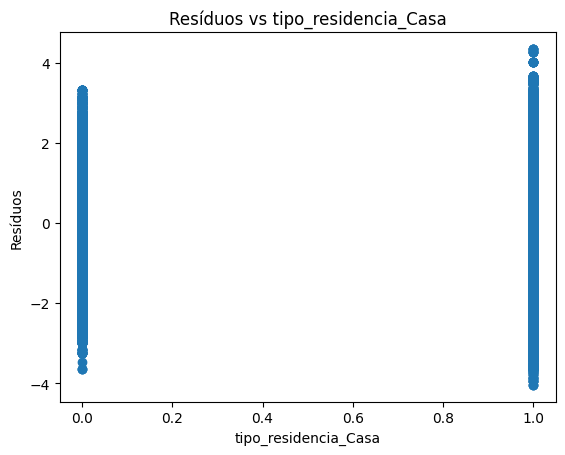

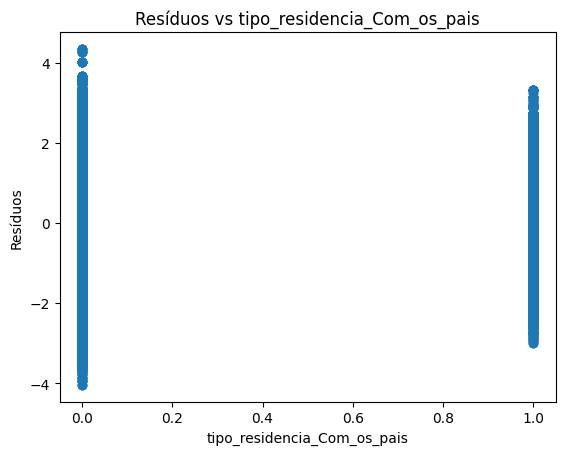

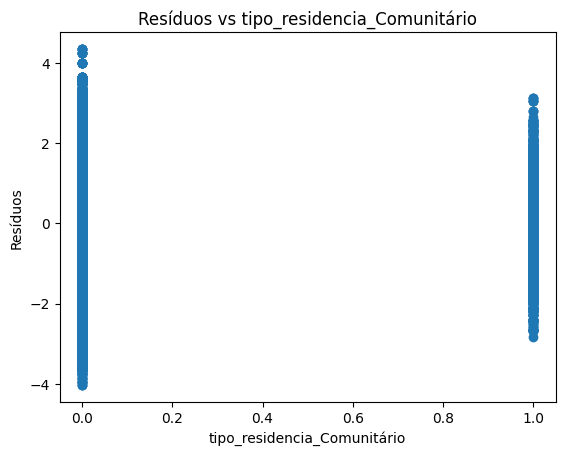

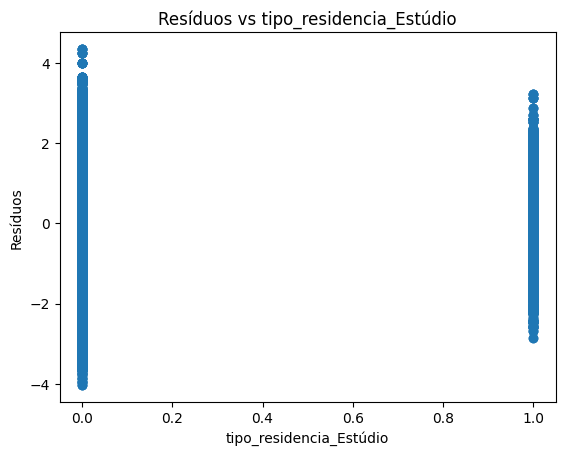

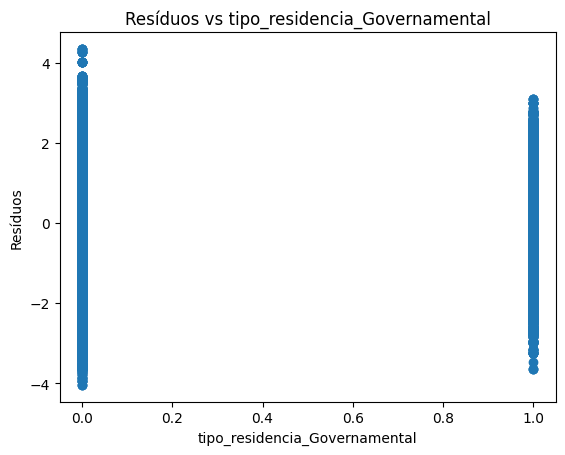

In [50]:
for col in df.columns.difference(['renda']):
    plt.scatter(df[col], residuals)
    plt.title(f'Resíduos vs {col}')
    plt.xlabel(col)
    plt.ylabel('Resíduos')
    plt.show()

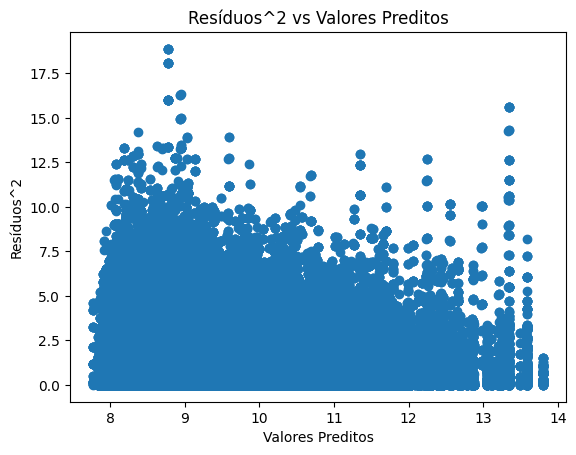

In [51]:
plt.scatter(model.fittedvalues, residuals**2)
plt.title('Resíduos^2 vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos^2')
plt.show()

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [52]:
# Realizando a decomposição QR
Q, R = qr(X, mode='economic')

# Calculando os resíduos
residuals = model.resid

# Calculando o MSE (Mean Squared Error)
mse = np.mean(residuals ** 2)

# Calculando os valores diagonais da matriz hat usando Q
hat_values = np.sum(Q ** 2, axis=1)

# Calculando os resíduos studentizados
studentized_residuals_manual = residuals / np.sqrt(mse * (1 - hat_values))

# Identificando outliers
outliers_manual = np.where(np.abs(zscore(studentized_residuals_manual)) > 3)[0]

# Identificando pontos que são discrepantes
discrepant_points = np.where(np.abs(studentized_residuals_manual) > 3)[0]
print(f"Pontos discrepantes: {discrepant_points}")

Pontos discrepantes: [   943   1066   1621   2740   3015   6908   7153   7918   8335   9873
  10090  10092  10273  12710  12743  12766  12950  13027  13083  14874
  15128  15303  15663  15684  15686  15788  16359  16483  16945  17063
  17326  17865  19548  20023  20399  21119  21906  23175  23353  25925
  26512  27256  29329  30164  30305  32242  32540  33162  33645  35077
  35618  36315  38464  38764  39189  39674  40039  40278  40320  40784
  41030  41334  43605  43745  44258  44699  45269  45610  46189  47184
  47975  48011  49046  49528  54904  57175  58210  61343  66185  71969
  73452  75020  81706  82317  83974  84349  93846  94257  96643  96950
  97578 101273 109227 135275 177660 178773 186609 193706 201765 204730
 206350 207006 211576 213524 216095 216428 217843 219640 220401 221478
 221642 228569 230890 231469 232894 237621 238661 239111 240584 243033
 243073 243209 244248 244251 248852 250185 251240 252421 253113 253795
 254402 256394 256599 258650 259758 260118 261824 262362

In [53]:
# Calculando a distância de Cook
n = len(df)
p = X.shape[1]  # número de variáveis independentes
cook_distance = (studentized_residuals_manual ** 2) * hat_values / (p * mse)

# Identificando pontos influentes usando um limiar comum (4/n)
influential_points = np.where(cook_distance > 4 / n)[0]
print(f"Pontos influentes: {influential_points}")

Pontos influentes: [    41    116    140 ... 749926 749928 749976]


## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

<Axes: >

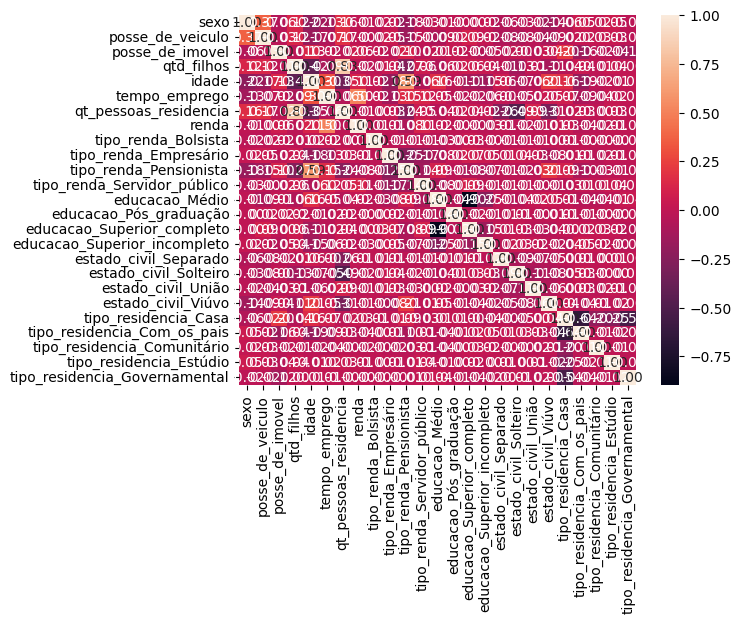

In [54]:
# Calculando a matriz de correlação de Spearman
spearman_corr_matrix = df.corr(method='spearman')

# Visualizando a matriz de correlação usando um heatmap
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f")


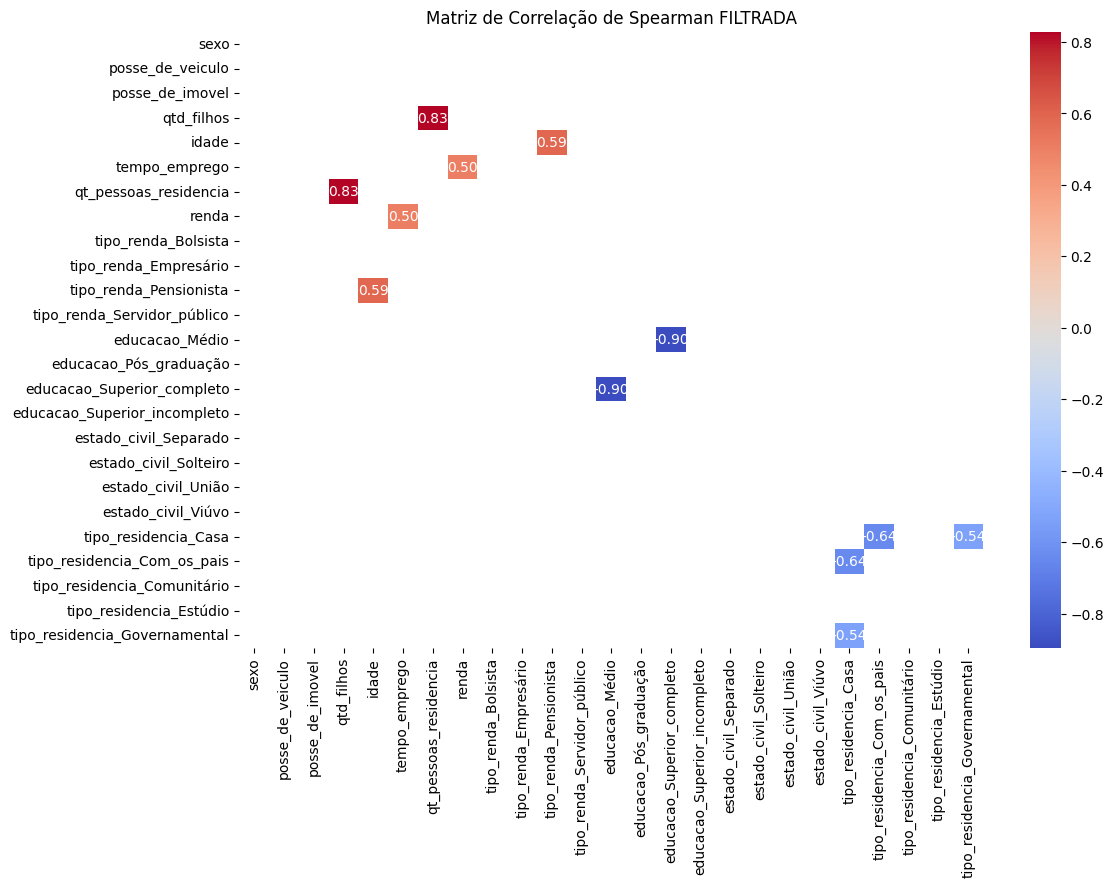

In [55]:
# Filtrando a matriz para mostrar apenas correlações significativas (por exemplo, valor absoluto > 0.5)
filtered_corr_matrix = spearman_corr_matrix[(spearman_corr_matrix.abs() > 0.5) & (spearman_corr_matrix != 1.0)]

# Visualizando a matriz de correlação filtrada usando um heatmap
plt.figure(figsize=(12, 8))  # Ajustar o tamanho da figura para torná-la mais legível
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlação de Spearman FILTRADA")
plt.show()


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculando VIF para cada variável independente
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns.difference(['renda'])
vif_data["VIF"] = [variance_inflation_factor(df[vif_data["feature"]].values, i) for i in range(len(vif_data["feature"]))]

# Visualizando VIF
print(vif_data)


                          feature         VIF
0                  educacao_Médio   51.000800
1          educacao_Pós_graduação    1.093005
2      educacao_Superior_completo   30.546864
3    educacao_Superior_incompleto    4.335052
4           estado_civil_Separado    3.469180
5           estado_civil_Solteiro    5.819883
6              estado_civil_União    1.124737
7              estado_civil_Viúvo    2.974192
8                           idade   34.625850
9                 posse_de_imovel    3.239438
10               posse_de_veiculo    1.965385
11          qt_pessoas_residencia  241.297113
12                     qtd_filhos   34.531136
13                           sexo    1.821747
14                  tempo_emprego    3.021523
15            tipo_renda_Bolsista    1.003940
16          tipo_renda_Empresário    1.477065
17         tipo_renda_Pensionista    2.195691
18    tipo_renda_Servidor_público    1.205362
19           tipo_residencia_Casa   63.722718
20    tipo_residencia_Com_os_pais 

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [20]:
# Removendo variáveis com VIF alto
features_to_remove = ['educacao_Médio', 'educacao_Superior_completo', 'idade', 'qt_pessoas_residencia', 'qtd_filhos', 'tipo_residencia_Casa']
df_adjusted = df.drop(features_to_remove, axis=1)

# Dividindo os dados em conjuntos de treino e teste
X = df.drop('renda', axis=1)
y = df['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_adjusted = df_adjusted.drop('renda', axis=1)
X_train_adjusted, X_test_adjusted, y_train_adjusted, y_test_adjusted = train_test_split(X_adjusted, y, test_size=0.2, random_state=42)

# Modelo original
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)

# Modelo ajustado
model_adjusted = LinearRegression()
model_adjusted.fit(X_train_adjusted, y_train_adjusted)
y_pred_adjusted = model_adjusted.predict(X_test_adjusted)
mse_adjusted = mean_squared_error(y_test_adjusted, y_pred_adjusted)

# Comparando métricas de desempenho
print(f"MSE do modelo original: {mse_original}")
print(f"MSE do modelo ajustado: {mse_adjusted}")


MSE do modelo original: 1.002506135605765
MSE do modelo ajustado: 1.003494140200117


> Os valores do MSE para o modelo original e ajustado são próximos, o que pode indiciar que a multicolinearidade não era um problema sério neste caso específico.